# [ESPM-163AC]: Lab2 - Intro to Correlation and Regression!

*Estimated Time: ~45 minutes*

One of the most important and interesting aspects of data science is making predictions about the future. How can we learn about temperatures a few decades from now by analyzing historical data about climate change and pollution? Based on a person's social media profile, what conclusions can we draw about their interests? How can we use a patient's medical history to judge how well he or she will respond to a treatment?

In last week's lab, you learned a bunch of data science techniques to manipulate tables and make cool visualizations out of them. In lecture this week, we studied concepts of correlation and regression to make predictions in one outcome based on another factor (or factors). Today, we will be putting these skills to use to study relationships between race, environmental factors, and health outcomes. Specifically, we will **predict health outcomes (cardiovascular disease, asthma, etc.) based on an environmental factor and/or race**. We will interpret the correlation coefficients and visualizations of predictions.

You've already seen how all of this comes together in lecture this week. In this lab, we will revisit our example of **the effect of race and air pollution on reported asthma rates** and, in the end, have you follow our steps to run a prediction using a **different** set of variables and interpret the results.

Let's get started! Run the cell below to import the tools we'll use in this notebook. Don't worry about getting an output -- simply run the cell!

In [1]:
# !pip install datascience
# !pip install numpy
# !pip install matplotlib
# !pip install statsmodels.formula.api
import datascience as ds
import numpy as np
import pandas
import matplotlib.pyplot as plots
import scipy as sp
%matplotlib inline

We will be using data from the website of the Office of Environmental Health Hazard Assessment. The file includes environmental and population data across different counties of California. In order to analyze the data, we must first import it to our Jupyter notebook and create a table. We will call this table `data`.


In [5]:
data = ds.Table.read_table("./data/ces_data.csv")
data.show(5)

Census Tract,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 Percentile Range,Total Population,California County,Children < 10 (%),Pop 11-64 years (%),Elderly > 65 (%),Hispanic (%),White (%),African American (%),Native American (%),Asian American (%),Other (%),ZIP,Nearby City (to help approximate location only),Longitude,Latitude,CES 3.0 Percentile,CES 3.0 Percentile Range,SB 535 Disadvantaged Community,Ozone,Ozone Pctl,PM2.5,PM2.5 Pctl,Diesel PM,Diesel PM Pctl,Drinking Water,Drinking Water Pctl,Pesticides,Pesticides Pctl,Tox. Release,Tox. Release Pctl,Traffic,Traffic Pctl,Cleanup Sites,Cleanup Sites Pctl,Groundwater Threats,Groundwater Threats Pctl,Haz. Waste,Haz. Waste Pctl,Imp. Water Bodies,Imp. Water Bodies Pctl,Solid Waste,Solid Waste Pctl,Pollution Burden,Pollution Burden Score,Pollution Burden Pctl,Asthma,Asthma Pctl,Low Birth Weight,Low Birth Weight Pctl,Cardiovascular Disease,Cardiovascular Disease Pctl,Education,Education Pctl,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
6.019e+09,94.09,100,95-100% (highest scores),3174,Fresno,18.8,73.6,7.6,65.3,4.2,24.6,0.5,3.5,1.8,93706,Fresno,-119.782,36.7097,100,95-100% (highest scores),Yes,0.065,98.18,15.4,97.22,48.524,95.54,681.2,80.92,2.75,47.82,18552,97.46,909.14,62.98,80.5,98.67,45.75,89.85,0.795,84.32,0,0,21.75,97.81,79.96,9.85,99.95,131.64,97.67,7.44,93.84,14.13,96.31,53.3,95.76,16.2,77.51,76.3,97.12,17.6,91.72,26,79.4,92.12,9.55,99.7
6.071e+09,90.68,99.99,95-100% (highest scores),6133,San Bernardino,19.7,76.1,4.2,91.1,5.8,0.7,0.3,1.4,0.7,91761,Ontario,-117.618,34.0578,99.99,95-100% (highest scores),Yes,0.062,91.1,13.31,93.64,38.556,92.12,904.66,96.11,1.37,41.34,7494.24,89.05,782.26,55.66,66.2,97.68,36,85.57,1.25,88.77,5,55.01,12,92.17,81.19,10,100,60.66,69.78,7.04,90.85,12.94,92.66,53.3,95.76,33.4,96.25,72.5,94.63,12.3,71.82,34.1,93.75,87.44,9.07,98.11
6.019e+09,85.97,99.97,95-100% (highest scores),3167,Fresno,21.5,72.5,6,63.6,5.3,18.9,0.6,9.8,1.8,93706,Fresno,-119.806,36.7355,99.97,95-100% (highest scores),Yes,0.062,91.1,15.4,97.22,47.445,95.42,681.2,80.92,3.03,48.75,12454.9,95.42,576.52,39,22,85.13,30.25,81.93,0.2,60.5,0,0,2.5,57.18,71.16,8.76,99,142.12,98.33,10.16,99.78,14.96,97.67,42.3,89.06,16.7,78.39,86.8,99.56,16.1,87.98,40.1,97.85,94.58,9.81,99.99
6.077e+09,82.49,99.96,95-100% (highest scores),6692,San Joaquin,18.7,74.5,6.8,57.4,6,12.5,0.3,20.9,2.8,95203,Stockton,-121.315,37.9405,99.96,95-100% (highest scores),Yes,0.046,53.02,12.54,84.02,24.117,73.52,278.76,29.11,12.93,60.56,2387.78,69.97,1305.01,78.29,50.1,96.1,132.1,98.41,0.795,84.32,19,98.63,27,99.1,74.48,9.17,99.59,142.17,98.34,6.23,80.65,14.72,97.17,40.8,87.52,15.3,75.14,61.3,85.57,19.6,94.97,21.1,63.54,86.7,8.99,97.72
6.019e+09,82.03,99.95,95-100% (highest scores),2206,Fresno,14.8,72.1,13.1,71.8,21.4,1.2,0.5,4.5,0.6,93725,Fresno,-119.718,36.6816,99.95,95-100% (highest scores),Yes,0.065,98.18,15.4,97.22,18.846,58.22,1000.24,98.64,3518.41,95.15,21790.7,98.15,435.16,24.3,60,97.15,54.2,92.09,13.1,99.7,0,0,50.8,99.91,80.2,9.88,99.99,90.48,89.54,4.5,38.92,12.82,92.36,45.1,91.13,14.7,73.72,66.4,90.23,18.6,93.65,28.1,83.98,80.08,8.3,92.76


<span style="color:green"> Briefly explain what NaN values are, why they are a problem, and show students what they look like in the table above. Show them also that the size of the table below is smaller than the above so they get a sense of the change! </span>

When doing data analysis, a lot of our work involves cleaning the data by removing NaN values. This way our data is in a format where we can carry out analysis, extract useful information and make predictive models. The following code extracts a cleaner version of the data for us, excluing null values and selecting only the useful columns. (You do not need to learn to clean data in this module)

In [3]:
clean_data = ds.Table.read_table("clean_ces_data.csv")

clean_data

Unnamed: 0,Census Tract,Total Population,California County,Hispanic (%),White (%),African American (%),Native American (%),Asian American (%),Other (%),Asthma,Cardiovascular Disease,Poverty,Unemployment
0,6.019e+09,3174,Fresno,65.3,4.2,24.6,0.5,3.5,1.8,131.64,14.13,76.3,17.6
1,6.071e+09,6133,San Bernardino,91.1,5.8,0.7,0.3,1.4,0.7,60.66,12.94,72.5,12.3
2,6.019e+09,3167,Fresno,63.6,5.3,18.9,0.6,9.8,1.8,142.12,14.96,86.8,16.1
3,6.077e+09,6692,San Joaquin,57.4,6,12.5,0.3,20.9,2.8,142.17,14.72,61.3,19.6
4,6.019e+09,2206,Fresno,71.8,21.4,1.2,0.5,4.5,0.6,90.48,12.82,66.4,18.6
5,6.0372e+09,2598,Los Angeles,98.1,1.2,0.1,0.1,0.2,0.3,68.74,10.4,66.4,11.6
6,6.077e+09,2396,San Joaquin,51.8,16.4,16.4,1.3,9.9,4.1,169.56,12.7,76.2,14.4
7,6.019e+09,4106,Fresno,52.7,2.7,28.7,0.4,14.3,1.2,142.28,14.96,74.5,20
8,6.03721e+09,2146,Los Angeles,79.3,8.9,4.1,0.1,7.2,0.5,58.03,7.24,75.7,28.5
9,6.019e+09,6343,Fresno,78,9.1,5.8,0.8,5.3,0.9,107.8,14.75,83.4,23.5


## The correlation coefficient - r

You will come across this number a lot when reading experimental research papers or conducting any sort of prediction. So what is a correlation coefficient? It's just a number between -1 and 1 that tells you:
1. **What the relationship between two variables looks like** and 
2. **How strong that relationship is**.



<span style="color:green"> try not to jump into using X and Y variables immediately -- students who don't have a mathy background will get lost immediately. Instead, try to explain r in the context of something first: the relationship between height and weight of a person, for example, and refer to X as height and Y as weight. Give students of an example to cling onto so they can make these concepts more tangible!</span>

The correlation coefficient ranges from −1 to 1. A value of 1 implies that a linear equation describes the relationship between X and Y perfectly, with all data points lying on a line for which Y increases as X increases. A value of −1 implies that all data points lie on a line for which Y decreases as X increases. A value of 0 implies that there is no linear correlation between the variables. ~Wikipedia


<span style="color:green">show an example!</span>

r = 1: the scatter diagram is a perfect straight line sloping upwards <br>
r = -1: the scatter diagram is a perfect straight line sloping downwards.

Suppose we wanted to find out whether a particular race is more prone to a particular disease. Calculating the correlation coefficient would help in our analysis to answer this question. As an example, suppose we want to know whether being hispanic means you are more prone to a cardiovascular disease. A high correlation coefficient closer to 1 would support this argument, while a negative one would oppose it. What would a value of 0 for the correlation coefficent suggest?

We use the following code to calculate a value for our correlation coefficient.

<span style="color:green">explain step by step what the following code does. Also instead of indexing by numbers, select columns by using actual names -- this will be a lot more natural for students to understand</span>

In [54]:


hispanic = clean_data[4]

asthma= clean_data[10]

sp.stats.pearsonr(hispanic, asthma)

(0.3590919232423713, 8.425623308934435e-229)


This function prints two numbers. The first number is our r value, and the second number is the p-value for our correlation. A p-value of under .05 indicates strong validity in the correlation. 

<span style="color:green">^^ interpret these numbers!</span>

#### To Do:

Pick a race of your choice and calculate the correlation coefficient with cardio vascular disease.

<span style="color:green">**For your lecture notebook, focus on explaining what these statistical concepts mean!**</span>

## Prediction Using Linear Regression

 <span style="color:green">Try to explain regression in more laymens terms -- students won't know what it means for the line to fit the data best.</span>

We saw that the correlation coefficient shows us **what** the relationship is (positive, negative, or no relationship) and **how strong** that relationship is.

Regression is an important tool in data science to make predictions based on data. The regression line is the best fit line for our data. It’s like an average of where all the points line up. In linear regression, the regression line is a perfectly straight line! 

In regression, we use the value of one variable (which we will call x
) to predict the value of another (which we will call y
). When the variables x
 and y
 are measured in standard units, the regression line for predicting y
 based on x
 has slope r
 and passes through the origin. Thus the equation of the regression line can be written as:

estimate of y = r * x   


In [25]:
from IPython.display import Image
Image("Downloads/regline.png")

TypeError: a bytes-like object is required, not 'str'

TypeError: a bytes-like object is required, not 'str'

<IPython.core.display.Image object>

Following are the equations to calculate the equation of regression line.


Slope of the regression line = r⋅SD of y / SD of x

Intercept of the regression line = average of y − slope⋅average of x

The three functions below compute the correlation, slope, and intercept. All of them take three arguments: the name of the table, the label of the column containing x, and the label of the column containing y. (The earlier method of calculating the correlation on the previous section is a shorthand method where the computer does all the computation!)

<span style="color:green"> explain this in detail in lecture! In lab, mention that the correlation is being used to calculate the slope -- so the regression line is totally dependent on the correlation coefficient. Also, when calculating r, don't use the scipy package -- use the function defined below.</span>

In [55]:
def standard_units(xyz):
    return (xyz - np.mean(xyz))/np.std(xyz) 

def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))

def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))

def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))




Suppose we want to find the equation of the regression line for the variables in the previous section - Race & Disease. We pick the same example again - Hispanic & Cardio Vascular.

In [9]:
slope_of_reg_line = slope(clean_data, "Hispanic (%)", "Asthma")
slope_of_reg_line



0.41220490076911265

In [10]:
intercept_of_reg_line = intercept(clean_data, "Hispanic (%)", "Asthma")
intercept_of_reg_line

37.19143315337998

Given the slope and intercept, what would the equation of the regression line of best fit be?


We can also plot our regression line for a better visual to inspect the relationship between race and disease. The following code plots that:

0.3590919232423713


<IPython.core.display.Javascript object>


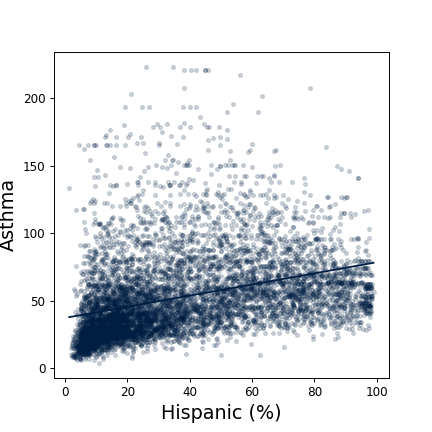

In [47]:
print(sp.stats.pearsonr(clean_data['Hispanic (%)'], clean_data['Asthma'])[0])
clean_data.scatter("Hispanic (%)", "Asthma", fit_line=True, alpha = .18, s = 10)


0.4972381286265192


<IPython.core.display.Javascript object>


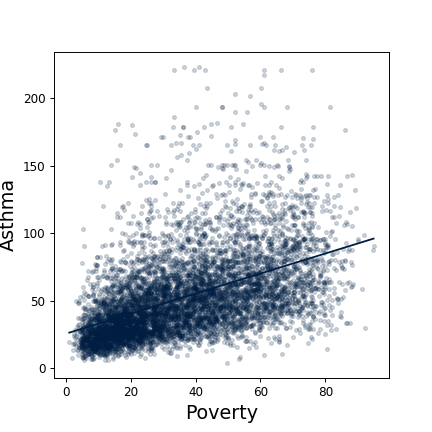

In [48]:
print(sp.stats.pearsonr(clean_data['Poverty'], clean_data['Asthma'])[0])
clean_data.scatter("Poverty", "Asthma", fit_line=True, alpha = .18, s = 10)

#### To Do:

Pick a race of your choice. Find the equation of regression line for that race with cardio vascular disease and plot a graph of your work.

So you see that linear regression of two variables (X and Y) is really just a line that goes through the scatter plot in a way that gives us the best estimate of what the Y value might be given an X value. If we are told that a Census Tract is made up 100% of Hispanics, looking at the plot above our prediction of frequency of Asthma attacks for that Census tract would be about 75; if we are told that a Census Tract has 0% Hispanics, our prediction would be a little less than 50. This is what the regression line allows us to do -- it allows us to see how one variable (X, i.e. % Hispanic) affects another variable (Y, i.e. number of asthma attacks), what the magnitude of this effect is, and, ultimately, it allows us to make predictions based on what we know about X.

# Multiple Regression!

Regression isn't limited to just two variables! We saw above that we predicted a `Y` variable based on just one `X` variable. As the name suggests, **Multiple** regression allows us to use more than one `X` variable to predict an outcome. If you know the age of a patient for example, that alone can help predict health outcomes like whether s/he has cancer: a teenager is less likely to have lung cancer than a 70 year old. But if you had more information on patients, like how many packs of cigarettes s/he smokes a week, you can imagine that our prediction will be more accurate since it is not solely dependent on age.

This is the idea behind Multiple Regression. In the last section, we explored how frequency of asthma attacks in census tracts is related to the proportion of Hispanics in the census tract and, separately, the pollution burden score. In this section, we'll explore how the **combination** of these two variables helps to more accurately predict Asthma attacks.

- In *single* regression, our regression line was in the form: $Y = slope*X + intercept$

- In *multiple* regression, our regression \*\*"line" is defined very similarly as: $Y = slope1*X_1 + slope2*X_2 + incercept$

\*\*You'll understand why "line" is in quotes when you see the multiple regression plot.

The slopes and intercept are calculated very similarly to what you saw before in single regression, but don't worry about the math behind this -- we'll just focus on how to **interpret** the predictive power of multipe regression as well as the 3-dimensional (!!) visualization of the regression plot.

### Testing...

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm


In [9]:
df = pd.read_csv('./data/ces_data.csv')
df = df.dropna()

In [10]:
df.columns

Index(['Census Tract', 'CES 3.0 Score', 'CES 3.0 Percentile',
       'CES 3.0 Percentile Range', 'Total Population', 'California County',
       'Children < 10 (%)', 'Pop 11-64 years (%)', 'Elderly > 65 (%)',
       'Hispanic (%)', 'White (%)', 'African American (%)',
       'Native American (%)', 'Asian American (%)', 'Other (%)', 'ZIP',
       'Nearby City \r\n(to help approximate location only)', 'Longitude',
       'Latitude', ' CES 3.0 Percentile', 'CES 3.0 \r\nPercentile Range',
       'SB 535 Disadvantaged Community', 'Ozone', 'Ozone Pctl', 'PM2.5',
       'PM2.5 Pctl', 'Diesel PM', 'Diesel PM Pctl', 'Drinking Water',
       'Drinking Water Pctl', 'Pesticides', 'Pesticides Pctl', 'Tox. Release',
       'Tox. Release Pctl', 'Traffic', 'Traffic Pctl', 'Cleanup Sites',
       'Cleanup Sites Pctl', 'Groundwater Threats', 'Groundwater Threats Pctl',
       'Haz. Waste', 'Haz. Waste Pctl', 'Imp. Water Bodies',
       'Imp. Water Bodies Pctl', 'Solid Waste', 'Solid Waste Pctl',
       

In [13]:
test = df.loc[:,['African American (%)','Pollution Burden Score', 'Asthma' ]]

In [17]:
test = test.rename(index=str, columns={"African American (%)": "african_american", "pollution_burden_score":"pollution_burden_score"})

In [18]:
test.columns

Index(['african_american', 'pollution_burden_score', 'Asthma'], dtype='object')

In [19]:
model = sm.ols(formula='Asthma ~ african_american + pollution_burden_score', data = test)
fit = model.fit()
fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Asthma   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     1299.
Date:                Mon, 03 Dec 2018   Prob (F-statistic):               0.00
Time:                        19:34:14   Log-Likelihood:                -35383.
No. Observations:                7557   AIC:                         7.077e+04
Df Residuals:                    7554   BIC:                         7.079e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 34.5355      1.056     32.709      0.000      32.466      36.605
african_american           1.6024      0.033     49.298      0.000       1.539       1.666
pollution_burden_score     1.6608      0.194      8.546      0.000       1.280       2.042
==============================================================================
Omnibus:                     1938.700   Durbin-Watson:                   1.688
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6500.092
Skew:                           1.281   Prob(JB):                         0.00
Kurtosis:                       6.752   Cond. No.                         40.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<IPython.core.display.Javascript object>


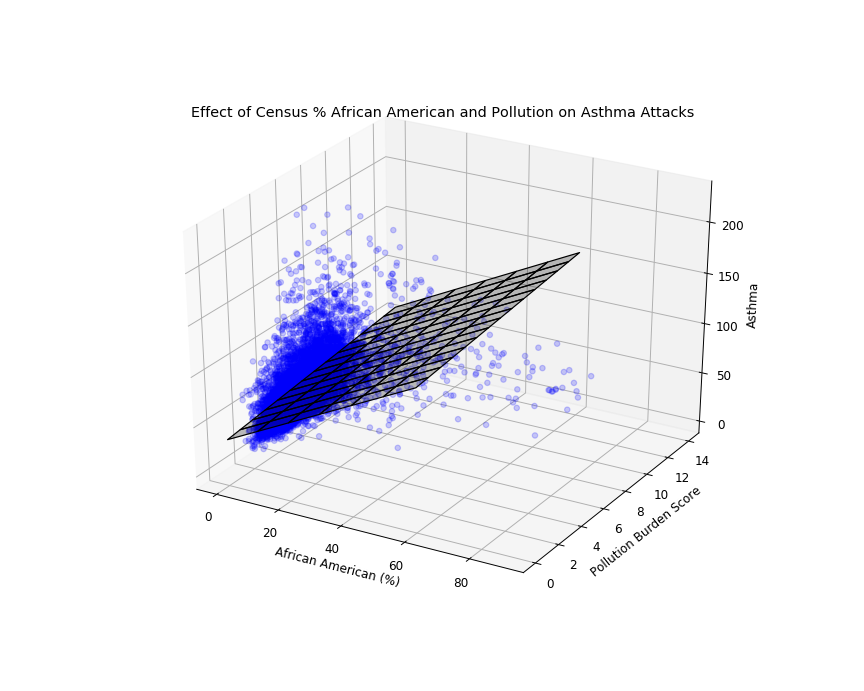

In [49]:
#this line makes the plot below interactive!
%matplotlib notebook

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 70, 10)                # generate a mesh
y_surf = np.arange(0, 15, 1)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'african_american': x_surf.ravel(), 'pollution_burden_score': y_surf.ravel()})
out = fit.predict(exog = exog)

ax.plot_surface(x_surf, y_surf,
                out.values.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.25)

ax.scatter(test['african_american'], test['pollution_burden_score'], test['Asthma'],
           c='blue',
           marker='o',
           alpha=.2)

ax.set_xlabel('African American (%)')
ax.set_ylabel('Pollution Burden Score')
ax.set_zlabel('Asthma')
ax.set_title('Effect of Census % African American and Pollution on Asthma Attacks')

plt.show()